### Problem#1 : Mid Point Method

#### Midpoint Method
Assume ODE of the form,
$$x'(t)=f(t,x(t))$$
Initial condition $x(t_{0})=x_{0}$.

The explicit method is given by the formula
$$x_{n+1}=x_{n}+hf\left(t_{n}+\frac{h}{2},x_{n}+\frac{h}{2}f(t_{n},x_{n})\right)$$



In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.optimize as opt

In [3]:
def Midpoint_method(func, x0, t_start, t_end, deltat):
    """
    This program solves a system of first order ODE using mid point method.
    
    user defined func: 
                        def diff_eqn(t, x):
                            if x < -1 or x > 1:
                                return np.nan
                            else:
                                return np.sqrt(1 - x**2)
    
    >>>t, x = Midpoint_method(diff_eqn, x0, 0, 1, 0.1)
    
    t:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
    x:  [[0.         0.09987492 0.1987492  0.29563156 0.38955061 0.4795646
                      0.56477086 0.64431479 0.71739842 0.7832883  0.84132273]]
    
    Written by: Anand Mathew
    Date: 04/19/23
    
    """
    # Number of time steps.
    Nsteps = int((t_end - t_start) / deltat) + 1
    
    # Initializing.
    t = np.zeros(Nsteps)
    t[0] = t_start
    t[-1] = t_end
    x = np.zeros((len(x0), Nsteps))
    x[:, 0] = x0
    
    # Calculating the final solutions using the midpoint method.
    for i in range(Nsteps - 1):
        t_average = t[i]+ deltat/ 2
        temp = x[:, i] + (deltat/2) * func(t[i], x[:, i])
        x[:, i+1] = x[:, i] + deltat * func(t_average, temp)
        t[i+1] = t[i] + deltat
    
    return t, x


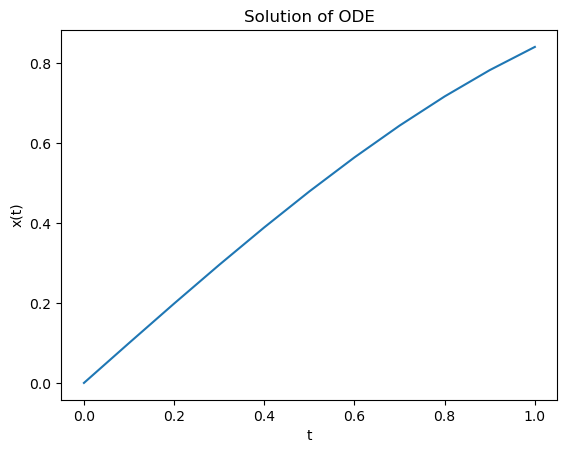

t:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x:  [[0.         0.09987492 0.1987492  0.29563156 0.38955061 0.4795646
  0.56477086 0.64431479 0.71739842 0.7832883  0.84132273]]


In [5]:
# ODE function
def diff_eqn(t, x):
    if x < -1 or x > 1:
        return np.nan
    else:
        return np.sqrt(1 - x**2)

# define the initial condition
x0 = np.array([0])

# solve the differential equation using the midpoint method
t, x = Midpoint_method(diff_eqn, x0, 0, 1, 0.1)

# plot the solution
plt.plot(t, x[0])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution of ODE')
plt.show()


print("t: ", t)
print("x: ", x)